# <center>Постановка задачи:<center>
* Исследовать данные и сделать выводы по полученным результатам


В ходе анализа нам необходимо:
* 1. Выяснить, какие факторы влияют на заработную плату специалиста DataScientist.
* 2. Ответить на ключевые вопросы:
   * Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
   * Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
   * Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
   * Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?


## <center>Загрузка и обработка данных<center>

In [19]:
# Импортируем основные библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm 
from statsmodels import stats as sms
import matplotlib.pyplot as plt 
import seaborn as sns

In [20]:
# Загружаем данные
data = pd.read_csv('asset-v1_SkillFactory+DST-3.0+28FEB2021+type@asset+block@ds_salaries.zip')
display(data.head())

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [21]:
# Поиск и удаление дубликатов
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))
data = data.drop_duplicates()
print('Размер таблицы после удаление дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаление дубликатов: (607, 12)


**Вывод:**
* Дубликатов в данных не обнаруженно.

In [22]:
# Выведем общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


**Вывод:**
   * 1. Типы данных признаков корректны
   * 2. Определенны числовые признаки (work_year, salary, salary_in_usd, remote_ratio)
   * 3. Определенны категориальные признаки (experience_level, employment_type, company_size, job_title, salary_currency,employee_residence, company_location)

In [23]:
# Удаляем неиформативные признаки
data = data.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1)
display(data.head())

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [24]:
mask_1 = data['job_title'] == 'Data Scientist'
mask_2 = data['work_year'] == 2022
display(data[mask_1 & mask_2]['salary_in_usd'].describe())
data[mask_1 & mask_2]['salary_in_usd'].mode()

count        77.000000
mean     136172.090909
std       54563.084740
min       18442.000000
25%      100000.000000
50%      140000.000000
75%      176000.000000
max      260000.000000
Name: salary_in_usd, dtype: float64

0    140000
Name: salary_in_usd, dtype: int64

In [25]:
mask_1 = data['job_title'] == 'Data Engineer'
mask_2 = data['work_year'] == 2022
display(data[mask_1 & mask_2]['salary_in_usd'].describe())
data[mask_1 & mask_2]['salary_in_usd'].mode()

count        89.000000
mean     126375.696629
std       55954.398677
min       25000.000000
25%       78526.000000
50%      120000.000000
75%      160000.000000
max      324000.000000
Name: salary_in_usd, dtype: float64

0    78526
Name: salary_in_usd, dtype: int64

**Выводы:**
   * 1. Признак Unnamed: 0 удален. Явно лишний признак, так как нумерация строк присутствует автоматически.
   * 2. Признак salary удален. Так как есть признак показывающий зарплату в долларах.
   * 3. Принзнак salary_currency удален. Раз есть признак показывающий зарплату в долларах, признак валюты не имеет ценности.

### Выводим статистические характеристики

In [26]:
# Для признака work_year
print(data['work_year'].mode())

0    2022
Name: work_year, dtype: int64


In [27]:
# Для признака remote_ratio
print(data['remote_ratio'].mode())

0    100
Name: remote_ratio, dtype: int64


In [28]:
# Для признака salary_in_usd
print(round(data['salary_in_usd'].describe()))

count       607.0
mean     112298.0
std       70957.0
min        2859.0
25%       62726.0
50%      101570.0
75%      150000.0
max      600000.0
Name: salary_in_usd, dtype: float64


In [29]:
# Для признака experience_level
print(data['experience_level'].describe())

count     607
unique      4
top        SE
freq      280
Name: experience_level, dtype: object


In [30]:
# Для признака employment_type
print(data['employment_type'].describe())

count     607
unique      4
top        FT
freq      588
Name: employment_type, dtype: object


In [31]:
# Для признака job_title
print(data['job_title'].describe())

count                607
unique                50
top       Data Scientist
freq                 143
Name: job_title, dtype: object


In [32]:
# Для признака employee_residence
print(data['employee_residence'].describe())

count     607
unique     57
top        US
freq      332
Name: employee_residence, dtype: object


In [33]:
# Для признака company_location
print(data['company_location'].describe())

count     607
unique     50
top        US
freq      355
Name: company_location, dtype: object


In [34]:
# Для для признака company_size
print(data['company_size'].describe())

count     607
unique      3
top         M
freq      326
Name: company_size, dtype: object


**Выводы:**
   * 1. Самый часто встречающийся год, в котором была выплачена зарплата - 2022.
   * 2. Наибольшее количество работы было выполнено удаленно. Самый частый показатель признака remote_ratio - 100.
   * 3. Средняя заработная плата равна 112298 долларам. Минимальная заработная плата равна 2859 долларам. Максимальный показатель заработной платы равен 600000 долларов.
   * 4. Самый распространенный показатель опыта работы это SE - Senior-level/Expert, встречается 280 раз.
   * 5. Самый расспространенный тип трудоустройства FT - полный рабочий день, втречается 588 раз.
   * 6. Самая распространенная должность Data Scientist, встречается 143 раза.
   * 7. Самая распространенная страна, в которой соискатель проживал в течении года, это US. Встречается 332 раза.
   * 8. Наибольшее число главных офисов работодателей находятся в US. Встречается 355 раз.
   * 9. Наибольшее количетсво компаний, имееют размер М - средняя компания. Показатель встречается 326 раз.

## <center>Визуальный анализ данных<center>

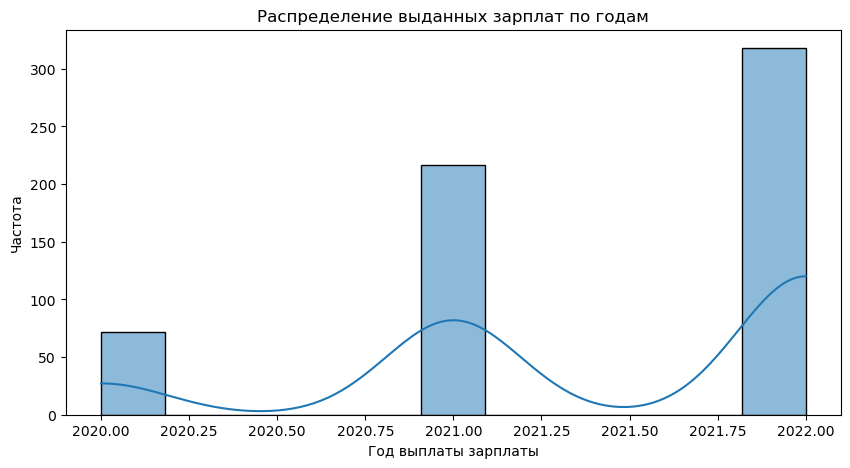

In [35]:
# Строим гистограмму распределения частоты для признака work_year
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(data['work_year'], kde=True)
axes.set(xlabel='Год выплаты зарплаты', ylabel='Частота')
axes.set(title='Распределение выданных зарплат по годам');

Большая часть зарплат выданна в 2022 году

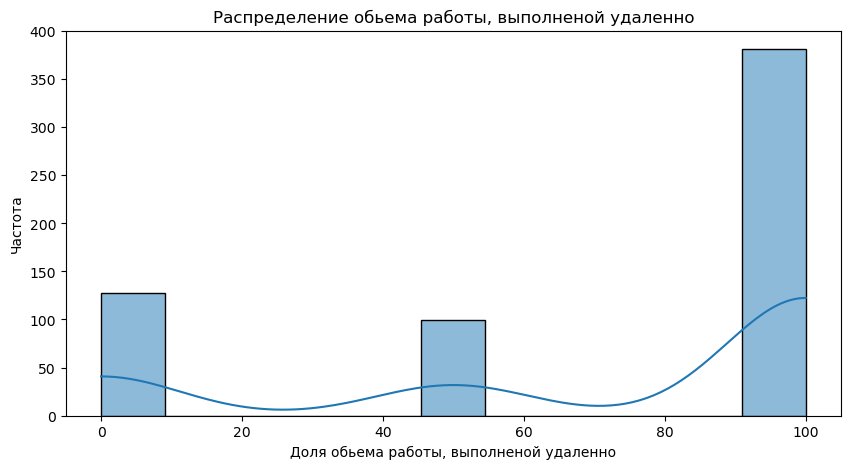

In [36]:
# Строим гистограмму распределение частоты для признака remote_ratio
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(data['remote_ratio'], kde=True)
axes.set(xlabel='Доля обьема работы, выполненой удаленно', ylabel='Частота')
axes.set(title='Распределение обьема работы, выполненой удаленно');

Большая часть работ выполнена удаленно

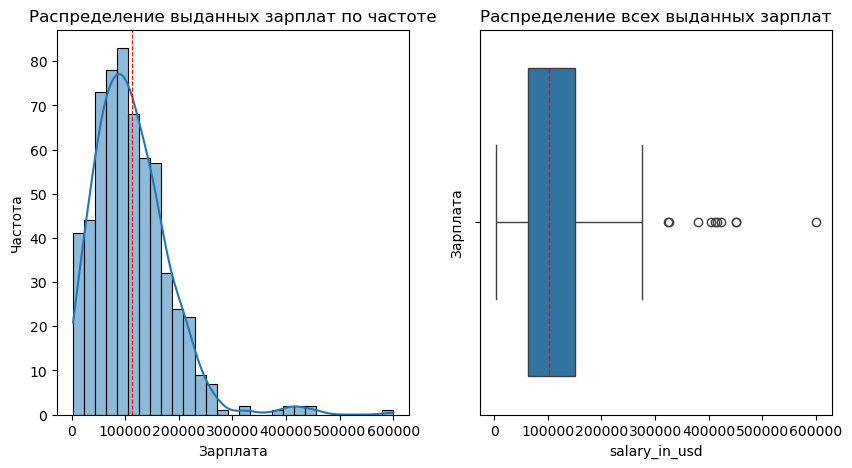

In [37]:
# Строим диграммы распределения частоты для признака salary_in_usd
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Зарплата', ylabel='Частота')
axes[0].set(title='Распределение выданных зарплат по частоте')
axes[0].axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=0.8);

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": "--"})
axes[1].set(ylabel='Зарплата')
axes[1].set(title='Распределение всех выданных зарплат');


Распределение не нормальное.
Самая часто выдаваемая зарплата равна 100.000, средняя зарплата находится примерно в том же диапазоне

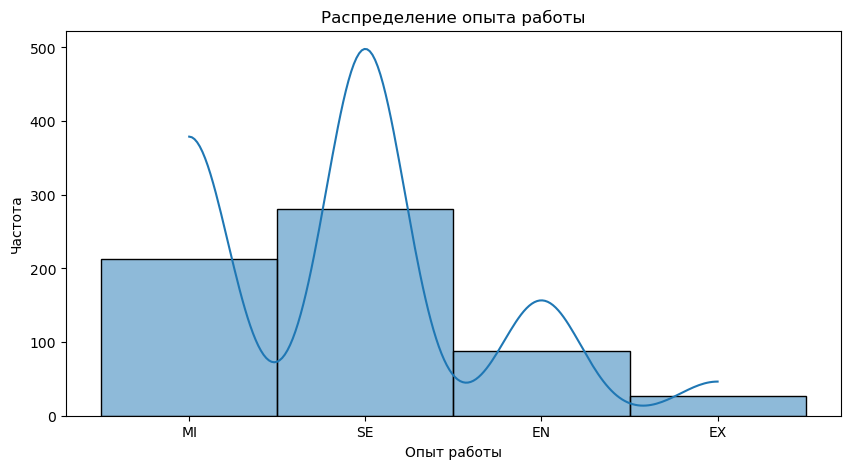

In [38]:
# Строим гистограмму распределения опыта работы по частоте
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(data['experience_level'], kde=True)
axes.set(xlabel='Опыт работы', ylabel='Частота')
axes.set(title='Распределение опыта работы');

Самый распространненый показатель опыта работы - SE.

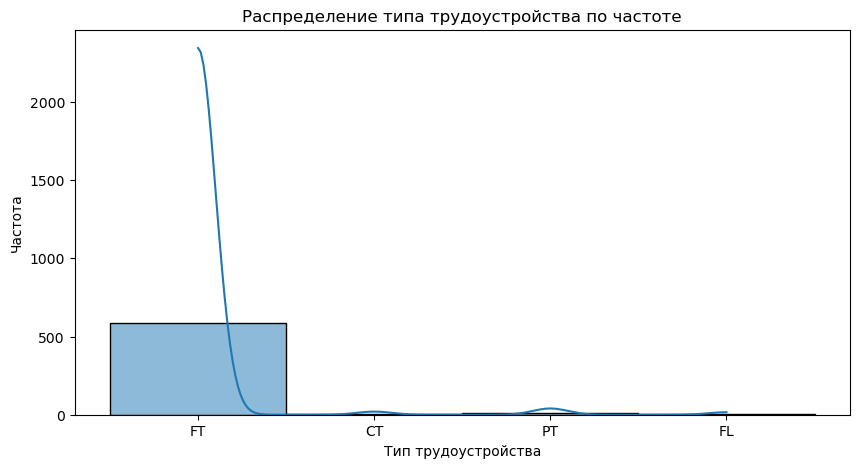

In [39]:
# Строим гистограмму распределение для признака employment_type
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(data['employment_type'], kde=True)
axes.set(xlabel='Тип трудоустройства', ylabel='Частота')
axes.set(title='Распределение типа трудоустройства по частоте');

Самый распространненый тип трудоустройтсва - FT

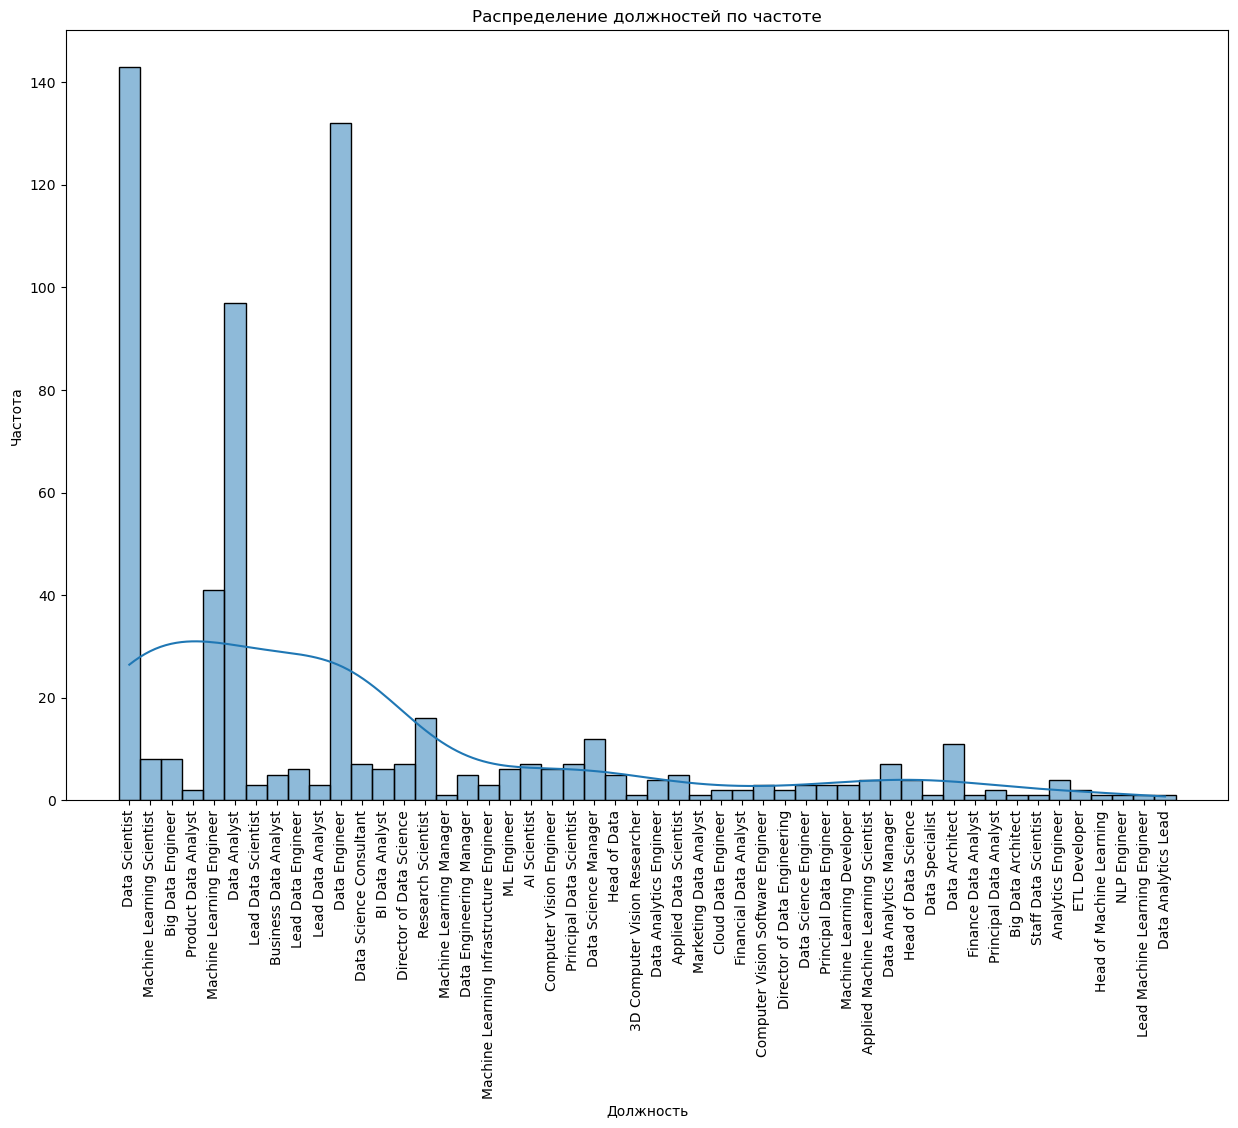

In [40]:
# Строим гистограмму распределения признака job_title
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
sns.histplot(data['job_title'], kde=True)
axes.set(xlabel='Должность', ylabel='Частота')
axes.set(title='Распределение должностей по частоте')
plt.xticks(rotation=90);

Самые распространненые должности(в порядке убывания) это: Data Scientist, Data Engineer, Data Analyst.

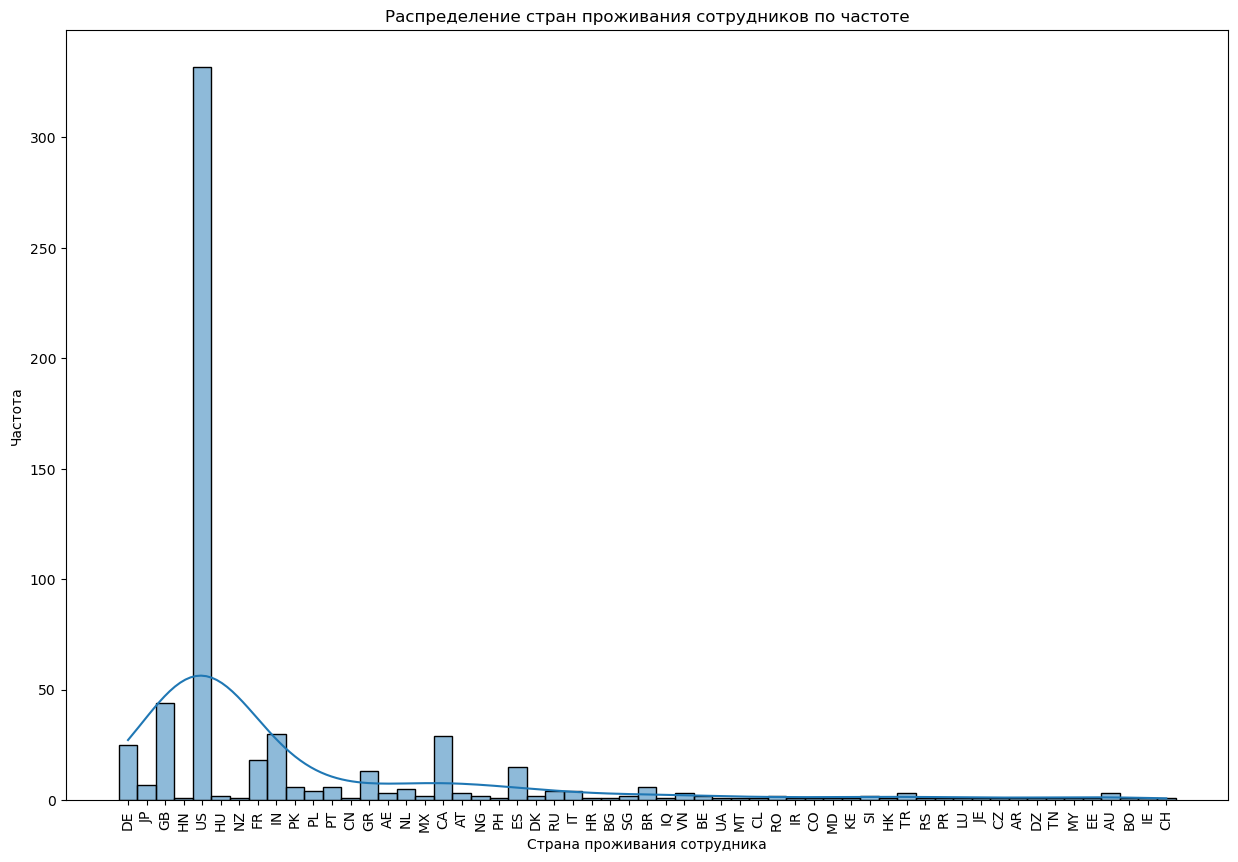

In [41]:
# Строим гистограмму распределения для признака employee_residence
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
sns.histplot(data['employee_residence'], kde=True)
axes.set(xlabel='Страна проживания сотрудника', ylabel='Частота')
axes.set(title='Распределение стран проживания сотрудников по частоте')
plt.xticks(rotation=90);

Самая распространенная страна проживания - US.

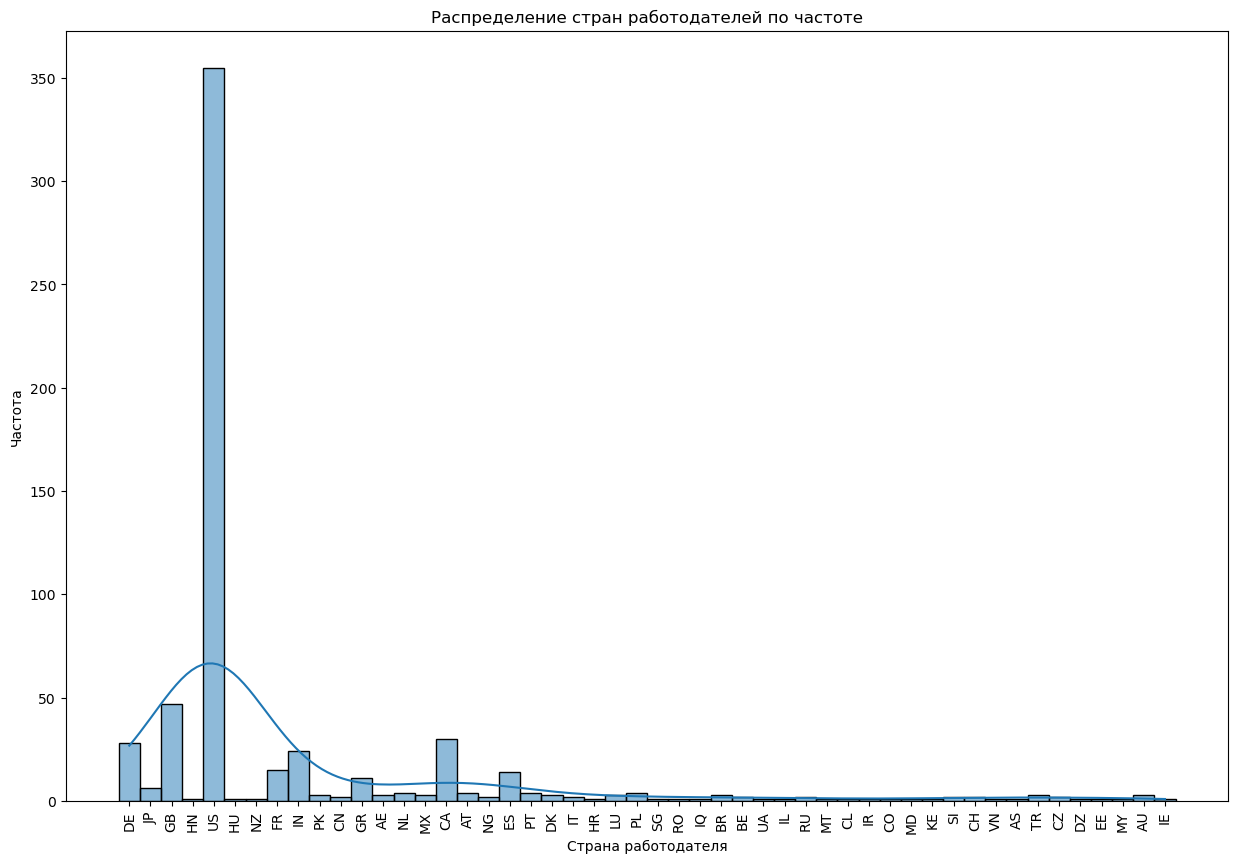

In [42]:
# Строим гистограмму распределения признака company_location
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
sns.histplot(data['company_location'], kde=True)
axes.set(xlabel='Страна работодателя', ylabel='Частота')
axes.set(title='Распределение стран работодателей по частоте')
plt.xticks(rotation=90);

Самая распространенная страна работодателя - US.

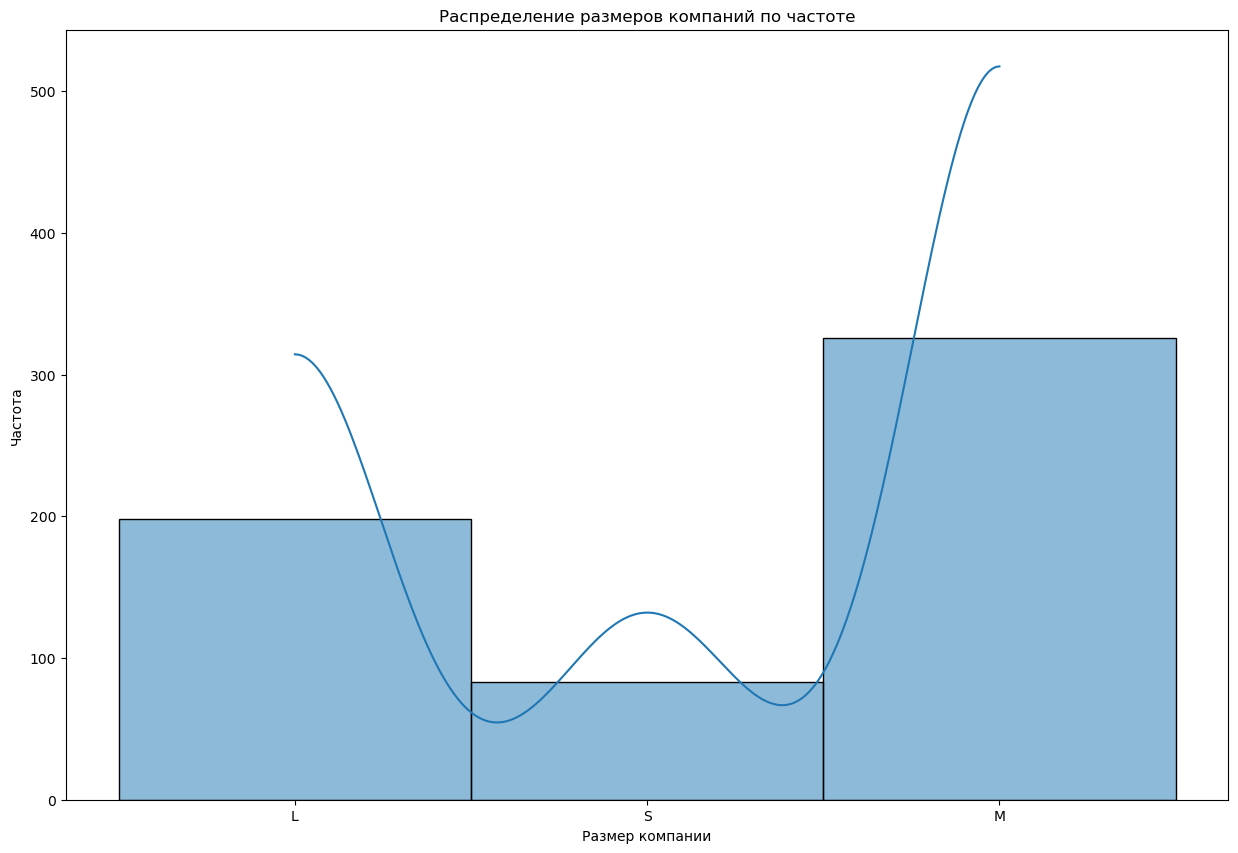

In [43]:
# Строим гистограмму распределения признака company_size
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
sns.histplot(data['company_size'], kde=True)
axes.set(xlabel='Размер компании', ylabel='Частота')
axes.set(title='Распределение размеров компаний по частоте');

Самый распространенный размер компаний - M.

In [44]:
# Создаем Data Frame для интересующих нас должностей Data Scientist
data_scientist_df = data[data['job_title'] == 'Data Scientist']

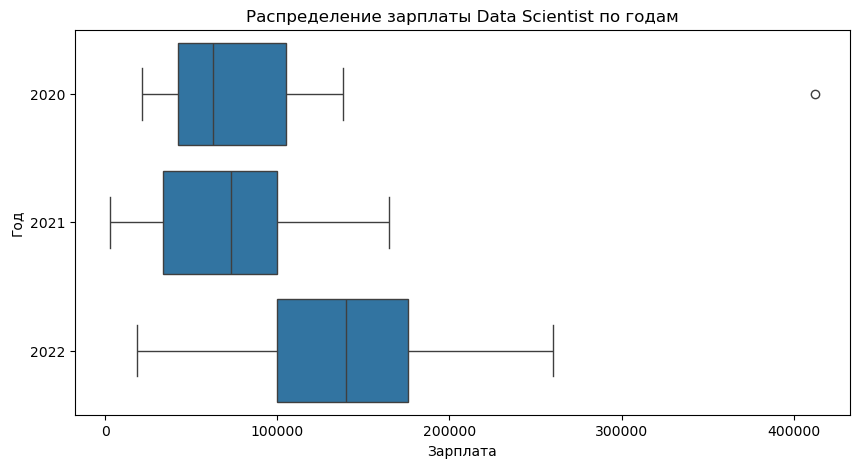

In [45]:
# Строим график распределения зарплат Data Scientist по годам
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.boxplot(x=data_scientist_df['salary_in_usd'], y=data_scientist_df['work_year'], orient='h')
axes.set(xlabel='Зарплата', ylabel='Год')
axes.set(title='Распределение зарплаты Data Scientist по годам');


**Вывод:**
   * 1. Визуальный анализ показал уменьшение нижнего и верхнего порога зарплат для Data Scientist в 2021 году по сравнению с 2020 годом.
   * 2. При этом средний показатель зарплаты увеличился с каждым годом.

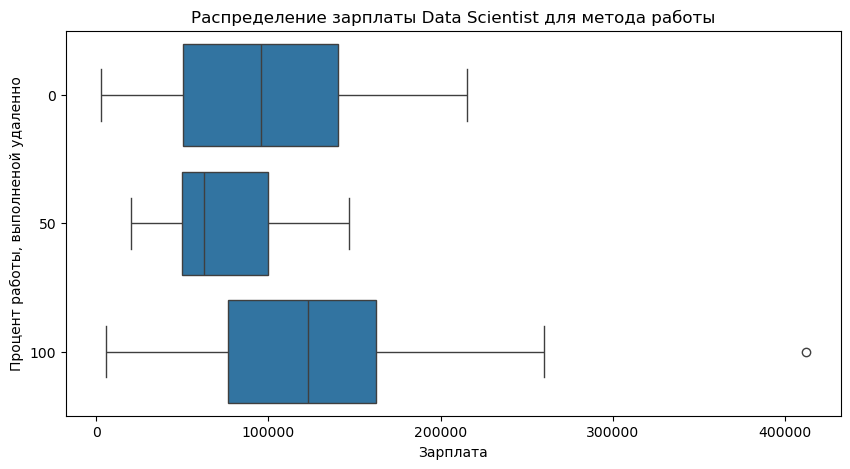

In [46]:
# Строим график распределения зарплат для Data Scientist в зависимости от общего процента работы, выполненной удаленно
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.boxplot(x=data_scientist_df['salary_in_usd'], y=data_scientist_df['remote_ratio'], orient='h')
axes.set(xlabel='Зарплата', ylabel='Процент работы, выполненой удаленно')
axes.set(title='Распределение зарплаты Data Scientist для метода работы');


**Вывод:**
   * 1. Самый высокий показатель зарплаты у специалистов работающих исключительно в удаленном формате.
   * 2. Самые низкие показатели у специалистов совмещающих работу удаленно и работу в офисе компании.

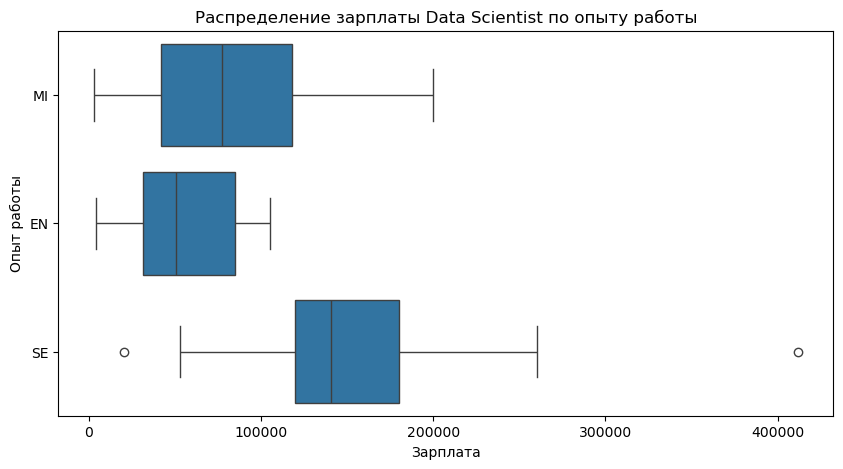

In [47]:
# Строим график распределения зарплат для Data Scienctist в зависимости от опыта работы
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.boxplot(x=data_scientist_df['salary_in_usd'], y=data_scientist_df['experience_level'], orient='h')
axes.set(xlabel='Зарплата', ylabel='Опыт работы')
axes.set(title='Распределение зарплаты Data Scientist по опыту работы');


**Вывод:**
   * Как и ожидалось самый низкий показатель зарплаты у специалистов начального уровня - EN. Далее идут специалисты мидл-уровня - MI. Самые высокие показатели у специалистов высшего уровня - SE.

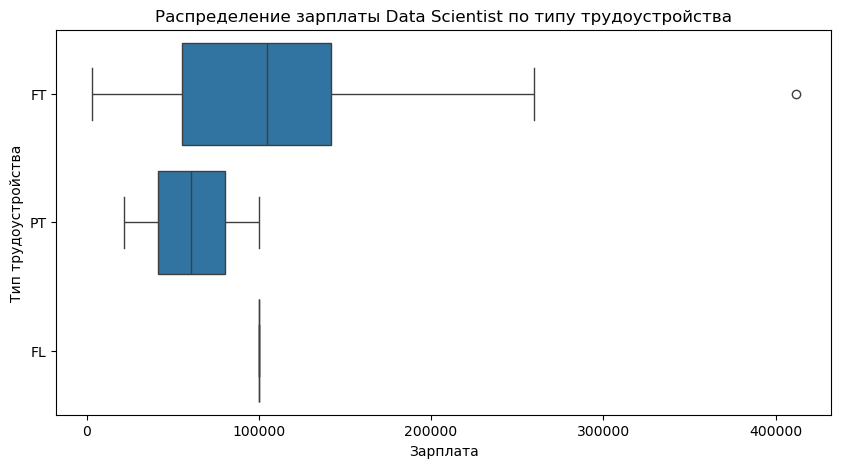

In [48]:
# Строим граик распределения зарплаты Data Scientist в зависимости от типа трудоустройства
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.boxplot(x=data_scientist_df['salary_in_usd'], y=data_scientist_df['employment_type'], orient='h')
axes.set(xlabel='Зарплата', ylabel='Тип трудоустройства')
axes.set(title='Распределение зарплаты Data Scientist по типу трудоустройства');

**Вывод:**
   * Самый высокий показатель зарплаты у специалистов утсроенных на полный рабочий день.

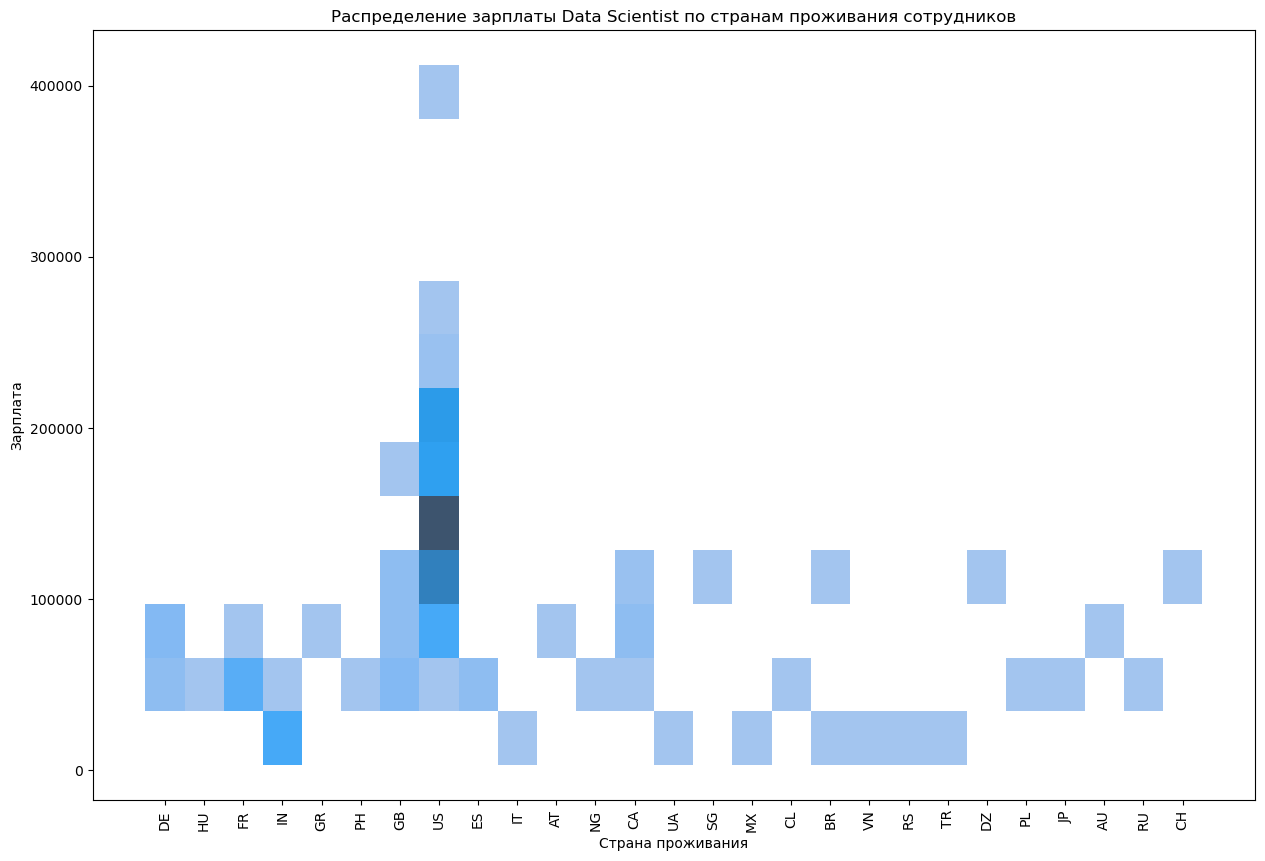

In [49]:
# Строим график распределения зарплаты для Data Scientist в зависимости от страны проживания сотрудника
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
sns.histplot(data=data_scientist_df, x=data_scientist_df['employee_residence'], y=data_scientist_df['salary_in_usd'])
axes.set(xlabel='Страна проживания', ylabel='Зарплата')
axes.set(title='Распределение зарплаты Data Scientist по странам проживания сотрудников')
plt.xticks(rotation=90);


**Выводы:**
  * Самае большие показатели зарплаты у сотрудников, проживающих в США.

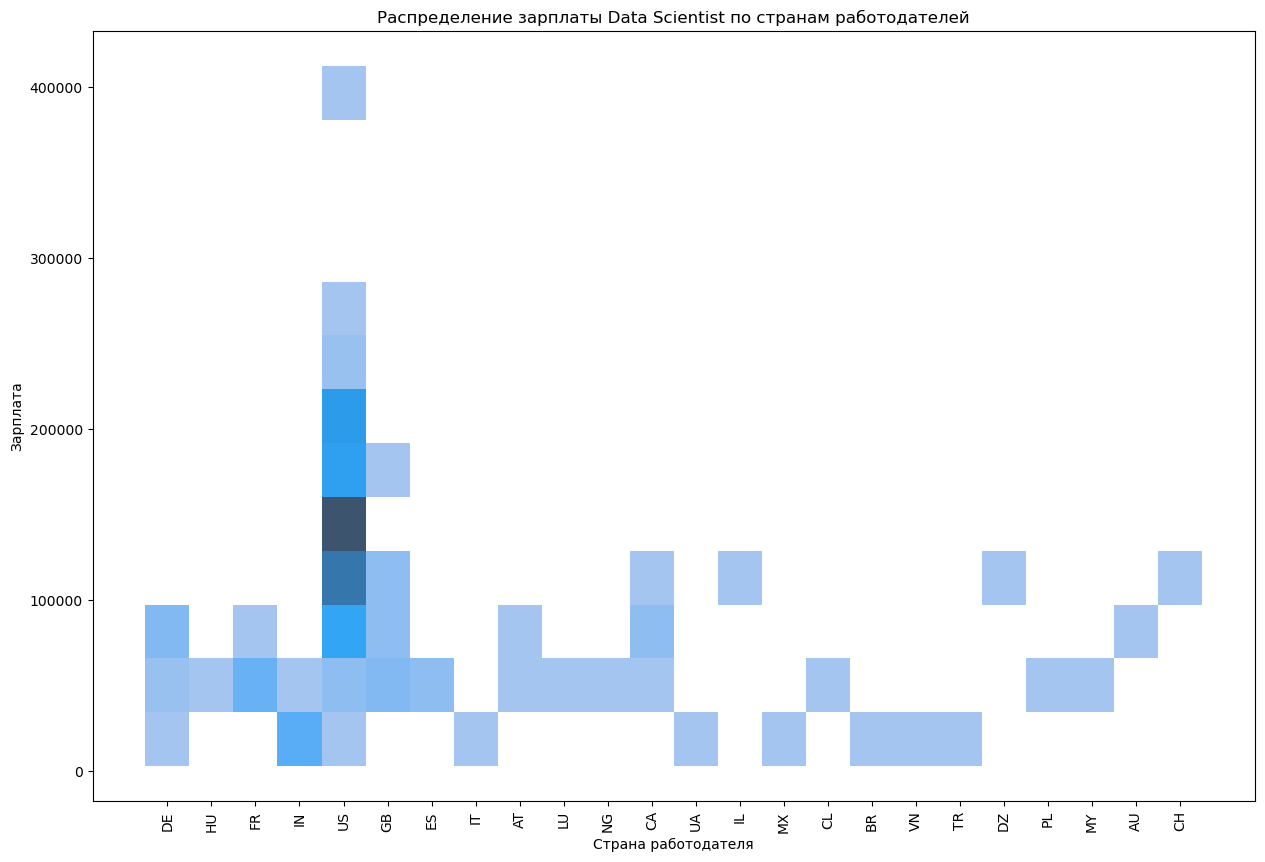

In [50]:
# Строим график распределения зарплаты для Data Scientist в зависимости от страны нахождение офиса компании
fig, axes = plt.subplots(1, 1, figsize = (15, 10))
sns.histplot(data=data_scientist_df, x=data_scientist_df['company_location'], y=data_scientist_df['salary_in_usd'])
axes.set(xlabel='Страна работодателя', ylabel='Зарплата')
axes.set(title='Распределение зарплаты Data Scientist по странам работодателей')
plt.xticks(rotation=90);

**Вывод:**
   * Здесь мы наблюдаем похожую картину с предыдущим графиком. Наибольшие зарплаты у специалистов работающих на компании, имеющие офис в США.

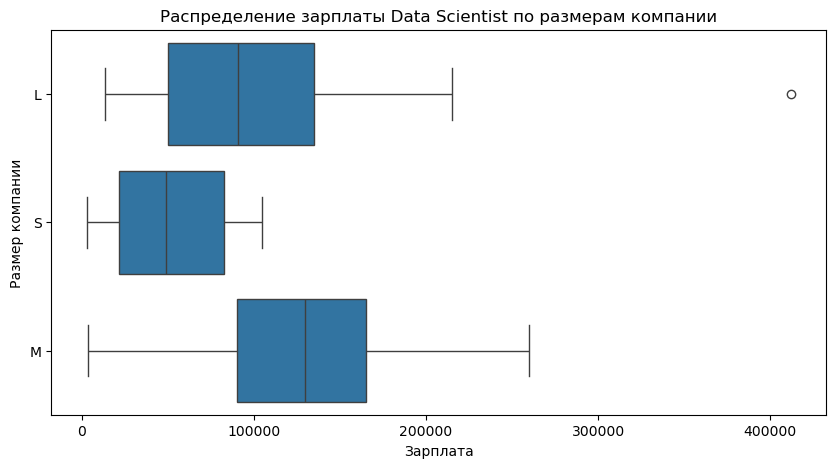

In [51]:
# Строим график распределения зарплат Data Scientist в зависимости от размера компании
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.boxplot(x=data_scientist_df['salary_in_usd'], y=data_scientist_df['company_size'], orient='h')
axes.set(xlabel='Зарплата', ylabel='Размер компании')
axes.set(title='Распределение зарплаты Data Scientist по размерам компании');

**Вывод:**
   * Самые низкие показатели зарплат у специалистов работающих в компаниях маленького размера - S. Далее следуют показатели зарплаты у специалистов работающих в больших компаниях - L. Самые высокие показатели у специалистов работающих в компаниях среднего размера - M.

In [52]:
# Создаем Data Frame для интересующих нас должностей Data Scientist и Data Engineer
data_scientist_engineer_df = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]

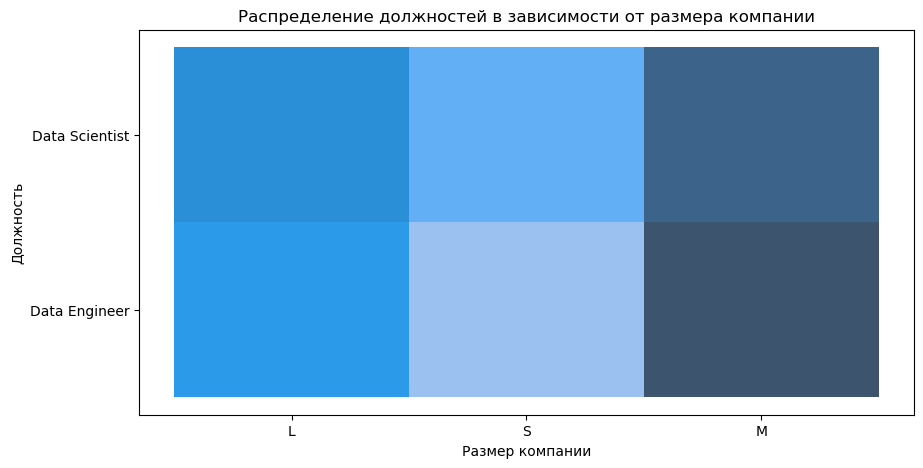

In [53]:
# Строим график зависимости специалистов Data Scientist и Data Engineer от размера компании
fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.histplot(x=data_scientist_engineer_df['company_size'], y=data_scientist_engineer_df['job_title'])
axes.set(xlabel='Размер компании', ylabel='Должность')
axes.set(title='Распределение должностей в зависимости от размера компании');

**Вывод:**
   * 1. В маленьких компаниях количество специалистов Data Scientist больше чем Data Engineer. Вероятно, это связано с тем, что у маленьких компаний нет огромного обьема данных, для работы с которыми потребывалось много специалистов Data Engineer.
   * 2. В средних компаниях специалистов Data Engineer больше чем Data Scientist.
   * 3. В больших компаниях специалистов Data Scientist больше чем Data Engineer. Вероятно, это связано с тем, что работа с огромными обьемами данных, характерная для больших компаний, частично автоматизированна. Вероятно, это и есть отличие в показателях для больших и средних компаний.

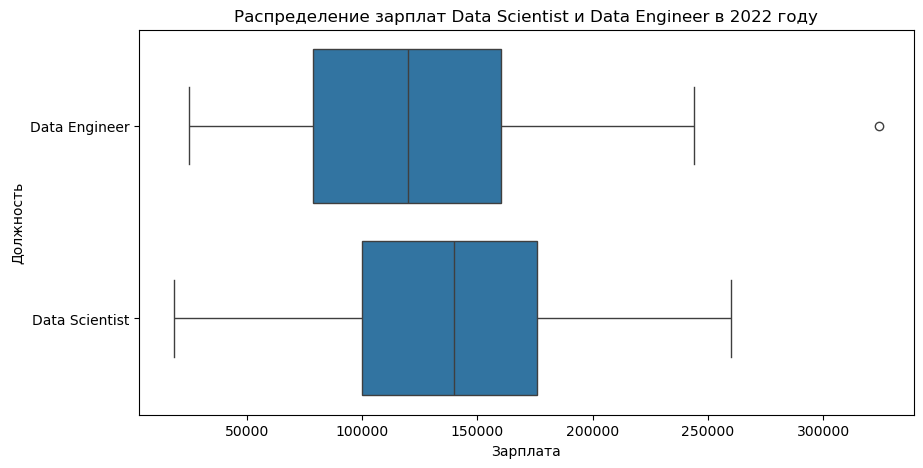

In [54]:
# Строим график зависимости зарплат Data Scientist и Data Engineer в 2022 году
data_year_2022 = data[data['work_year'] == 2022]
data_sci_eng = data_year_2022[((data_year_2022['job_title'] == 'Data Scientist') | (data_year_2022['job_title'] == 'Data Engineer'))]

fig, axes = plt.subplots(1, 1, figsize = (10, 5))
sns.boxplot(x=data_sci_eng['salary_in_usd'], y=data_sci_eng['job_title'], orient='h')
axes.set(xlabel='Зарплата', ylabel='Должность')
axes.set(title='Распределение зарплат Data Scientist и Data Engineer в 2022 году');

**Вывод:**
   
   Как показывает график, начальный и верхний порог зарплат у специалистов Data Engineer ниже чем у специалистов Data Scientist. Средний показатель заработной платы так же выше у специалистов Data Scientist.

**Общие выводы по визуальному анализу данных:**
   * 1. Признак метода работы, влияет на показатель заработной платы. Специалисты, работающие полностью удаленно, имеют самый высокий показатель заработной платы. Вероятно, это можно обьяснить вспышкой вирусных заболеваний которые происходили в тот момент времени. Многие компании переводили своих сотрудников на удаленный метод работы, вследствии чего у компаний уменьшились расходы на содержание и обслуживание офисных помещений, что могло создать излишки для повышения заработной платы специалистов.
   * 2. Признак опыта работы один из ключевых признаков влияющих на заработную плату. Чем выше показатель опыта работы специалиста, тем выше уровень его заработной платы.
   * 3. Признак типа трудоустройства также оказывает влияние на уровень заработной платы. Логично что самый высокий показатель у специалистов, устроенных на полный рабочий день.
   * 4. Признак страны проживания и связанный с ним признак страны работодателя так же интересны в этом вопросе. Среди этих признаков главный фактор, влияющий на уровень заработной платы, это страна - US (Соединенные Штаты Америки). В обоих признаках самый высокие показатели заработной платы связанны с этой страной. Это можно обьяснить наличием в США головных офисов крупных IT-компаний, например Google, крупнейших онлайн магазинов (Amazon), и знаменитой Селиконовой Долины. Во всех этих случаях крайне востребованны специалисты по Data Science.
   * 5. Еще один признак влияющий на заработную плату - это размер компании. Самый низкий показатель у маленьких компаний. Можно обьяснить это куда меньшим денежным оборотом по сравнению с компаниями больших размеров. Средний показатель у компаний крупных размеров. Вероятно тут играет факт большого количества разнообразных IT-специалистов в таких компаниях, из-за чего размеры заработной платы усреднены. Также вероятно играет роль более высокая текучка кадров. Чем больше специалистов, тем меньше ценность каждого из них по отдельности. Крупные компании всегда могут найти замену для сотрудника. Всех этих недостатков лишены компании среднего размера, по крайней мере частично. Поэтому у них самый высокий показатель заработной платы специалистов.

## <center>Статистический анализ данных<center>

In [55]:
# Задаем уровень значимости
alpha = 0.05

# Функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным.'.format(alpha))
        
# Функция о принятии решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))    

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
**Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): зарплаты специалистов Data Scientist не изменились
$$ H_0 : μ_1 = μ_2 = μ_3$$
*Альтернативная гипотеза* ($H_1$): зарплата специалистов Data Scientist за 2020 год ($μ_1$) меньше чем зарплата за 2021 год ($μ_2$), а а зарплата за 2021 год меньше чем за 2022 ($μ_3$)
$$ H_1 : μ_1 < μ_2 < μ_3

In [56]:
# Используем выборку из данных для специальности Data Scientist
data_scientist_df = data[data['job_title'] == 'Data Scientist']
# Берем данные по зарплате за 2020 год
year_salary_2020 = data_scientist_df.loc[data_scientist_df['work_year'] == 2020, 'salary_in_usd']
# Берем данные по зарплате за 2021 год
year_salary_2021 = data_scientist_df.loc[data_scientist_df['work_year'] == 2021, 'salary_in_usd']
# Берем данные по зарплате за 2022 год
year_salary_2022 = data_scientist_df.loc[data_scientist_df['work_year'] == 2022, 'salary_in_usd']

**Проверка на нормальность**


Используем тест Шапиро-Уилка

In [57]:
print('Для 2020 года:')
result = stats.shapiro(year_salary_2020)
decision_normality(result[1])

print('Для 2021 года:')
result = stats.shapiro(year_salary_2021)
decision_normality(result[1])

print('Для 2022 года:')
result = stats.shapiro(year_salary_2022)
decision_normality(result[1])


Для 2020 года:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для 2021 года:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для 2022 года:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Одна из групп не распределенна нормально. Следует использовать непараметрический тест.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса.

**Проведём тест**

In [58]:
_, p =stats.kruskal(year_salary_2020, year_salary_2021, year_salary_2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:**

Мы можем утверждать что зарплаты специалистов Data Scientist изменялись от года к году. И судя по визуальному анализу, зарплаты специалистов растут.

### Наблюдается зависимость зарплаты у специалистов Data Scientist от метода работы?
**Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): зарплата специалистов Data Scientist не зависит от метода работы
$$ H_0 : μ_1 = μ_2 = μ_3$$
*Альтернативная гипотеза* ($H_1$): зарплаты специалистов Data Scientist не работающих удаленно ($μ_1$), зарплаты специалистов Data Scientist частично работающих удаленно ($μ_2$) и зарплаты специалистов Data Scientist работающих полностью удаленно ($μ_3$) не равны.
$$ H_1 : μ_1 \neq μ_2 \neq μ_3

In [59]:
# Берем данные для не удаленного метода работы
salary_remote_zero = data_scientist_df.loc[data_scientist_df['remote_ratio'] == 0, 'salary_in_usd']
# Берем данные для частично удаленного метода работы
salary_remote_half = data_scientist_df.loc[data_scientist_df['remote_ratio'] == 50, 'salary_in_usd']
# Берем данные для полностью удаленного метода работы
salary_remote_full = data_scientist_df.loc[data_scientist_df['remote_ratio'] == 100, 'salary_in_usd']

**Проверка на нормальность**


Используем тест Шапиро-Уилка

In [60]:
print('Для не удаленного метода работы:')
result = stats.shapiro(salary_remote_zero)
decision_normality(result[1])

print('Для частично удаленного метода работы:')
result = stats.shapiro(salary_remote_half)
decision_normality(result[1])

print('Для полностью удаленного метода работы:')
result = stats.shapiro(salary_remote_full)
decision_normality(result[1])

Для не удаленного метода работы:
p-value = 0.363
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для частично удаленного метода работы:
p-value = 0.482
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для полностью удаленного метода работы:
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Одна из групп не распределенна нормально. Следует использовать непараметрический тест.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса.

**Проведём тест**

In [61]:
_, p =stats.kruskal(salary_remote_zero, salary_remote_half, salary_remote_full)
decision_hypothesis(p)

p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:**

Мы можем утверждать, что зарплаты специалистов Data Scientist зависят от метода работы. Ту же зависимость показал и визуальный анализ.

### Наблюдается зависимость зарплаты у специалистов Data Scientist от опыта работы?
**Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): зарплата специалистов Data Scientist не зависит от опыта работы
$$ H_0 : μ_1 = μ_2 = μ_3 $$
*Альтернативная гипотеза* ($H_1$): зарплаты специалистов Data Scientist начального уровня ($μ_1$), зарплаты специалистов Data Scientist уровня Middle ($μ_2$) и зарплаты специалистов Data Scientist уровня Senior ($μ_3$) не равны.
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$


В данном признаке присутствует 4 категория Executive, но специалистов Data Scientist с таким опытом работы в данных нет.

In [62]:
# Берем данные для специалистов уровня Junior
salary_junior = data_scientist_df.loc[data_scientist_df['experience_level'] == 'EN', 'salary_in_usd']
# Берем данные для специалистов уровня Middle
salary_middle = data_scientist_df.loc[data_scientist_df['experience_level'] == 'MI', 'salary_in_usd']
# Берем данные для специалистов уровня Senior
salary_senior = data_scientist_df.loc[data_scientist_df['experience_level'] == 'SE', 'salary_in_usd']

**Проверка на нормальность**


Используем тест Шапиро-Уилка

In [63]:
print('Для Junior специалистов:')
result = stats.shapiro(salary_junior)
decision_normality(result[1])

print('Для Middle специалистов:')
result = stats.shapiro(salary_middle)
decision_normality(result[1])

print('Для Senior специалистов:')
result = stats.shapiro(salary_senior)
decision_normality(result[1])

Для Junior специалистов:
p-value = 0.174
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для Middle специалистов:
p-value = 0.178
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для Senior специалистов:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Одна из групп не распределенна нормально. Следует использовать непараметрический тест.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса.

**Проведём тест**

In [64]:
_, p =stats.kruskal(salary_junior, salary_middle, salary_senior)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:**

Мы можем утверждать, что зарплаты специалистов Data Scientist зависят от опыта работы. Ту же зависимость показал и визуальный анализ.

### Наблюдается зависимость зарплаты у специалистов Data Scientist от типа трудоустройства?
**Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): зарплата специалистов Data Scientist не зависит от типа трудоустройства
$$ H_0 : μ_1 = μ_2 = μ_3 $$
*Альтернативная гипотеза* ($H_1$): зарплаты специалистов Data Scientist нанятых на неполный рабочий день ($μ_1$), зарплаты специалистов Data Scientist нанятых на полный рабочий день ($μ_2$) и зарплаты специалистов Data Scientist нанятых на фриланс ($μ_3$) не равны.
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$


В данном признаке присутствует 4 категория CT (контракт), но специалистов Data Scientist с данным типом трудоустройства в данных нет.

In [65]:
# Берем данные для специалистов нанятых на неполный рабочий день
salary_pt = data_scientist_df.loc[data_scientist_df['employment_type'] == 'PT', 'salary_in_usd']
# Берем данные для специалистов нанятых на полный рабочий день
salary_ft = data_scientist_df.loc[data_scientist_df['employment_type'] == 'FT', 'salary_in_usd']
# Берем данные для специалистов нанятых на фриланс
salary_fl = data_scientist_df.loc[data_scientist_df['employment_type'] == 'FL', 'salary_in_usd']

**Проверка на нормальность**


Так как в нескольких выборках слишком малое количество значений, тест на нормальность распределения провести не представляется возможным.

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Не удалось провести тест на нормальность. Следует использовать непараметрический тест.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса.

**Проведём тест**

In [66]:
_, p =stats.kruskal(salary_pt, salary_ft, salary_fl)
decision_hypothesis(p)

p-value = 0.522
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**

Нет оснований утверждать что тип трудоустройства влияет на заработную плату, несмотря на показателя визуального анализа. Однако этот тест не является показательным из-за малого количества значений в некоторых выборках.

### Наблюдается зависимость зарплаты у специалистов Data Scientist от размера компании?
**Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): зарплата специалистов Data Scientist не зависит от размера компании
$$ H_0 : μ_1 = μ_2 = μ_3 $$
*Альтернативная гипотеза* ($H_1$): зарплаты специалистов Data Scientist работающих в маленьких компаниях ($μ_1$), зарплаты специалистов Data Scientist работающих в компаниях среднего размера ($μ_2$) и зарплаты специалистов Data Scientist работающих в крупных компаниях  ($μ_3$) не равны.
$$ H_1 : μ_1 \neq μ_2 \neq μ_3 $$

In [67]:
# Берем данные для специалистов в малых компаниях
salary_s = data_scientist_df.loc[data_scientist_df['company_size'] == 'S', 'salary_in_usd']
# Берем данные для специалистов в компаниях среднего размера
salary_m = data_scientist_df.loc[data_scientist_df['company_size'] == 'M', 'salary_in_usd']
# Берем данные для специалистов в крупных компаниях
salary_l = data_scientist_df.loc[data_scientist_df['company_size'] == 'L', 'salary_in_usd']

**Проверка на нормальность**


Используем тест Шапиро-Уилка

In [68]:
print('Для малых компаний:')
result = stats.shapiro(salary_s)
decision_normality(result[1])

print('Для компаний среднего размера:')
result = stats.shapiro(salary_m)
decision_normality(result[1])

print('Для крупных компаний:')
result = stats.shapiro(salary_l)
decision_normality(result[1])

Для малых компаний:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для компаний среднего размера:
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для крупных компаний:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Одна из групп не распределенна нормально. Следует использовать непараметрический тест.

Чтобы проверить нашу гипотезу, можно использовать критерий Краскела-Уоллиса.

**Проведём тест**

In [69]:
_, p =stats.kruskal(salary_s, salary_m, salary_l)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:**
Мы можем утверждать что размеры зарплат специалистов Data Scientist зависят от размера компании. Ту же зависимость показал и визуальный анализ данных.

###  Дополнительный анализ. Наблюдается ли рост зарплаты у специалистов Data Scientist в зависимости от размера компании?
**1.Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): размер  зарплаты специалистов Data Scientist в малых компаниях ($μ_1$), больше либо равен размеру зарплаты специалистов Data Scientist в компаниях среднего размера ($μ_2$).
$$ H_0 : μ_1 >= μ_2 $$
*Альтернативная гипотеза* ($H_1$): размер зарплаты специалистов Data Scientist работающих в маленьких компаниях ($μ_1$) меньше чем размер зарплаты специалистов Data Scientist работающих в компаниях среднего размера ($μ_2$).
$$ H_1 : μ_1 < μ_2 $$

**2.Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): размер зарплаты специалистов Data Scientist, работающих в компаниях среднего размера ($μ_2$), больше либо равен размеру зарплаты специалистов Data Scientist в крупных компаниях ($μ_3$).
$$ H_0 : μ_2 >= μ_3 $$
*Альтернативная гипотеза* ($H_1$): размер зарплаты специалистов Data Scientist, работающих в компаниях среднего размера ($μ_2$), меньше чем размер зарплаты специалистов Data Scientist работающих в крупных компаниях ($μ_3$).
$$ H_1 : μ_2 < μ_3 $$

**Выберем подходящий статистический тест для первой части**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Тест Шапиро-Уилка показал, что требуемые группы распределенны нормально. Следует использовать параметрический тест.

Чтобы проверить нашу гипотезу, можно использовать двухвыборочный t-критерий.

**Проведём тест**

In [70]:
# проведем тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_s, salary_m)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, используем параметр equal_var = False.')
else:
    print('Дисперсии одинаковы, используем параметр equal_var = True')

Тест на равенство дисперсий
p-value = 0.025
Дисперсии не одинаковы, используем параметр equal_var = False.


In [71]:
_,p = stats.ttest_ind(salary_s, salary_m, alternative='less', equal_var=False)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Выберем подходящий статистический тест для второй части**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Тест Шапиро-Уилка показал, что одна из групп не распределенна нормально. Следует использовать непараметрический тест.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [72]:
_,p = stats.mannwhitneyu(salary_m, salary_l, alternative='less')
decision_hypothesis(p)

p-value = 0.994
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод:**
В первом варианте, мы можем утверждать, что зарплаты специалистов Data Scientist увеличились с увеличением размера компании, с маленькой до средней. Во втором варианте, зарплаты специалистов Data Scientist, работающих в компаниях среднего размера, оказались выше чем в крупных компаниях. Ту же зависимость показал и визуальный анализ данных.

### Есть ли зависимость между наличием должностей Data Scientist и Data Engineer и размером компании?
**Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): признаки "job_title" для должностей Data Scientist и Data Engineer, и размер компании "company_size" независимы.
*Альтернативная гипотеза* ($H_1$): признаки "job_title" для должностей Data Scientist и Data Engineer, и размер компании "company_size" зависимы.

In [73]:
# Создаем Data Frame для нужных должностей за все время
data_sci_eng_all = data[((data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer'))]

# Создадим таблицу сопряженности
table = pd.crosstab(data_sci_eng_all['job_title'], data_sci_eng_all['company_size'])
display(table)

company_size,L,M,S
job_title,,,
Data Engineer,37,89,6
Data Scientist,45,77,21


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «job_title»? — Категориальный.
* Сколько сравниваемых групп? — Две.

Чтобы проверить нашу гипотезу, можно использовать критерий хи-квадрата.

**Проведём тест**

In [74]:
_,p,_,_ = stats.chi2_contingency(table)
decision_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод:**


Мы  можем утверждать, что между наличием должностей Data Scientist и Data Engineer и размером компании есть зависимость.

### Как соотносятся зарплаты у специалистов Data Scientist и Data Engineer в 2022 году?
**Сформулируем нулевую и альтернативную гипотезы**


*Нулевая гипотеза* ($H_0$): зарплата специалистов Data Scientist ($μ_1$), меньше или равна зарплате специалистов Data Engineer ($μ_2$)
$$ H_0 : μ_1 = μ_2 = μ_3 $$
*Альтернативная гипотеза* ($H_1$): зарплаты специалистов Data Scientist ($μ_1$), больше чем у специалистов Data Engineer ($μ_2$)
$$ H_1 : μ_1 > μ_2 $$

In [75]:
# Берем данные для зарплат специалистов Data Scientist
salary_scientist = data_sci_eng.loc[data_sci_eng['job_title'] == 'Data Scientist', 'salary_in_usd']
# Берем данные для зарплат специалистов Data Engineer
salary_engineer = data_sci_eng.loc[data_sci_eng['job_title'] == 'Data Engineer', 'salary_in_usd']

**Проверка на нормальность**


Используем тест Шапиро-Уилка

In [76]:
print('Для зарплат Data Scientist:')
result = stats.shapiro(salary_scientist)
decision_normality(result[1])

print('Для зарплат Data Engineer:')
result = stats.shapiro(salary_engineer)
decision_normality(result[1])

Для зарплат Data Scientist:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для зарплат Data Engineer:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Одна из групп не распределенна нормально. Следует использовать непараметрический тест.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна-Уитни.

**Проведём тест**

In [82]:
salary_scientist.values

array([130000,  90000, 136620,  99360, 117789, 104702, 146000, 123000,
        65438,  39263, 165220, 120160, 180000, 120000,  95550, 167000,
       123000, 150000, 211500, 138600, 170000, 123000, 215300, 158200,
       180000,  71982,  45807, 260000, 180000,  80000, 140400, 215300,
        31615,  18442, 104890, 140000, 220000, 140000, 183228,  91614,
       185100, 200000, 120000, 230000, 100000, 100000,  35590, 100000,
       165000,  52396,  40000,  86703,  48000, 122346,  69336, 135000,
        78000, 141300, 102100, 205300, 140400, 176000, 144000, 205300,
       140400, 140000, 210000, 140000, 210000, 140000, 210000, 140000,
       230000, 150000, 210000, 160000, 130000], dtype=int64)

In [84]:
salary_engineer.values

array([135000, 170000, 150000,  52351, 242000, 200000,  78526,  52351,
        45807, 181940, 132320, 220110, 160080, 165400, 132320, 243900,
       128875,  93700, 156600, 108800, 113000,  78526,  65438, 160000,
       136000, 165400, 136994, 101570, 132320, 155000, 117789, 209100,
       154600, 175000,  98158, 183600,  65949,  49461,  78526,  58894,
        63900,  82900, 100800,  49461,  87932,  76940, 104702,  91614,
        65949,  87932,  98158,  78526,  76940, 209100, 154600, 180000,
        80000, 105000,  54957, 120000, 100000, 324000, 216000, 210000,
        58035, 115000,  65000,  68147, 155000, 206699,  99100, 130000,
       115000, 110500, 130000, 160000, 200100, 160000, 145000,  70500,
       175100, 140250,  54000, 100000,  25000, 220110, 160080, 154000,
       126000], dtype=int64)

**Вывод:**
Мы не можем утверждать, что зарплаты специалистов Data Scientist больше чем у специалистов Data Engineer в 2022 году. Визуальный анализ показал обратный результат.

## Финальный вывод по поставленным задачам:
   * 1. Факторы влияющие не зарплату специалистов Data Scientist:
      * Год выдачи зарплаты. Статистический и визуальный анализ данных показали что, зарплаты изменялись от года к году. Средний показатель зарплаты с каждым годом увеличивался.
      * Метод работы. Статистический и визуальный анализ показал что, зарплаты отличаются в зависимости от метода работы. Спецталисты, работающие в удаленном формате, получают зарплату выше чем остальные категории.
      * Опыт работы. Статистический и визуальный анализ показал что, зарплаты отличаются в зависимости от опыта работы. Чем выше опыт работы, тем выше показатель зарплаты.
      * Размер компании. Статистический и визуальный анализ показал что, размер зарплаты отличается в зависимости от размера компании. Самый высокий показатель у компаний среднего размера, самый низкий - у компаний малого размера.
   * 2. Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist? 
      * По результатам статистического и визуального анализа, мы может утверждать что зарплаты специалистов Data Scientist увеличиваются с каждым годом. По визальному анализу также видно, что нижний и верхний порог зарплаты в 2021 годы немного уменьшился по сравнению с 2020 годом, средняя зарплата все же увеличилась.
   * 3. Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
      * Визуальный анализ показал что зарплаты специалистов Data Scientist в 2022 году, выше чем у специалистов Data Engineer. Но статистический анализ показал, что нет оснований для данного утверждения. Потому мы предпологаем что зарплаты специалистов этих двух должностей примерно равны.
   * 4. Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
      * Самый низкий показатель у маленьких компаний. Можно обьяснить это куда меньшим денежным оборотом по сравнению с компаниями больших размеров. Средний показатель у компаний крупных размеров. Вероятно тут играет факт большого количества разнообразных IT-специалистов в таких компаниях, из-за чего размеры заработной платы усреднены. Также вероятно играет роль более высокая текучка кадров. Чем больше специалистов, тем меньше ценность каждого из них по отдельности. Крупные компании всегда могут найти замену для сотрудника. Всех этих недостатков лишены компании среднего размера, по крайней мере частично. Поэтому у них самый высокий показатель заработной платы специалистов.
   * 5. Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

   
      Визуальный и статистический анализ показал что, связь действительно есть.
      * В маленьких компаниях количество специалистов Data Scientist больше чем Data Engineer. Вероятно, это связано с тем, что у маленьких компаний нет огромного обьема данных, для работы с которыми потребывалось много специалистов Data Engineer.
      * В средних компаниях специалистов Data Engineer больше чем Data Scientist.
      * В больших компаниях специалистов Data Scientist больше чем Data Engineer. Вероятно, это связано с тем, что работа с огромными обьемами данных, характерная для больших компаний, частично автоматизированна. Вероятно, это и есть отличие в показателях для больших и средних компаний.